Imports and loading dataset

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your CSV data
df = pd.read_csv('data.csv')
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Confusion Matrix:
[[70  1]
 [ 2 41]]

Precision: 0.976
Recall: 0.953
ROC AUC: 0.997


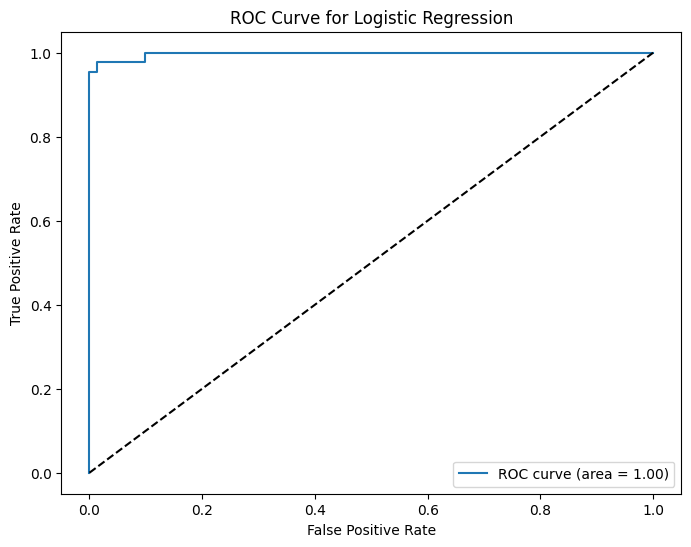


Tuned Confusion Matrix (threshold=0.3):
[[67  4]
 [ 1 42]]


"\ndef sigmoid(z):\n    return 1 / (1 + np.exp(-z))\n\nScikit-learn's LogisticRegression handles the sigmoid (logistic) function internally.\n\nWhen you call model.predict_proba(X) or model.decision_function(X), scikit-learn computes the linear combination of features (z = w₀ + w₁x₁ + ... + wₙxₙ) and then applies the sigmoid function to get probabilities.\n\n"

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Setting feature and target columns
feature_cols = [col for col in df.columns if col not in ['id', 'diagnosis', 'Unnamed: 32']]
target_col = 'diagnosis'

X = df[feature_cols]
y = df[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities and classes
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nPrecision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_probs):.3f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Threshold tuning example
threshold = 0.3
y_pred_tuned = (y_probs >= threshold).astype(int)
print("\nTuned Confusion Matrix (threshold=0.3):")
print(confusion_matrix(y_test, y_pred_tuned))

# Sigmoid function e
'''
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Scikit-learn's LogisticRegression handles the sigmoid (logistic) function internally.

When you call model.predict_proba(X) or model.decision_function(X), scikit-learn computes the linear combination of features (z = w₀ + w₁x₁ + ... + wₙxₙ) and then applies the sigmoid function to get probabilities.

'''


Sigmoid Function Explanation


The Sigmoid function, also known as the Logistic function, is a non-linear function fundamental to Logistic Regression. Its primary role is to transform the linear output generated by the model (which is a weighted sum of input features plus an intercept, often referred to as the log-odds) into a value constrained between 0 and 1. This output is interpreted as the estimated probability that a given instance belongs to the positive class in a binary classification problem. Mathematically, the Sigmoid function σ(z) is defined as σ(z)= 1 / (1 + exp(-z))
​
 , where z represents the linear combination of input features and the model's coefficients. This formula ensures that regardless of how large or small z is, the output probability will always fall within the (0,1) interval, making it suitable for probability estimation